In [5]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [6]:
df = pd.read_csv("UpdatedStudentsPerformance.csv")

In [7]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [8]:
df.describe()

,math score,reading score,writing score
count,990.000000,985.000000,989.000000
mean,66.208081,69.261929,68.142568
std,15.103724,14.634171,15.199780
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [9]:
df.size

8000

In [10]:
df.shape

(1000, 8)

In [11]:
df.min()

gender                                          f
race/ethnicity                            group A
parental level of education    associate's degree
lunch                                free/reduced
test preparation course                 completed
math score                                    0.0
reading score                                17.0
writing score                                10.0
dtype: object

In [12]:
df.max()

gender                                     male
race/ethnicity                          group E
parental level of education    some high school
lunch                                  standard
test preparation course                    none
math score                                100.0
reading score                             100.0
writing score                             100.0
dtype: object

In [13]:
df.std

<bound method NDFrame._add_numeric_operations.<locals>.std of      gender race/ethnicity parental level of education         lunch   
0    female        group B           bachelor's degree      standard  \
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0

In [14]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [15]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  15
writing score                  11
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df:
    if df[column].dtypes == "object":
        df[column] = le.fit_transform(df[column])

In [17]:
mean = df.mean()
median = df.median()
mode = df.mode()

In [18]:
print(mean)
print("-----")
print(median)
print("-----")
print(mode)

gender                          1.477000
race/ethnicity                  2.174000
parental level of education     2.486000
lunch                           0.645000
test preparation course         0.642000
math score                     66.208081
reading score                  69.261929
writing score                  68.142568
dtype: float64
-----
gender                          1.0
race/ethnicity                  2.0
parental level of education     2.0
lunch                           1.0
test preparation course         1.0
math score                     66.0
reading score                  70.0
writing score                  69.0
dtype: float64
-----
   gender  race/ethnicity  parental level of education  lunch   
0     1.0             2.0                          4.0    1.0  \
1     NaN             NaN                          NaN    NaN   

   test preparation course  math score  reading score  writing score  
0                      1.0        62.0           72.0           74.0  
1   

In [19]:
mean_fill = df.fillna(mean)

In [20]:
mean_fill.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [21]:
median_fill = df.fillna(median)
mode_fill = df.fillna(mode)

In [22]:
median_fill.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [23]:
mode_fill.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  15
writing score                  11
dtype: int64

In [24]:
df_mode = df
df_mode["math score"] = df_mode["math score"].fillna(df_mode["math score"].mode()[0])
df_mode["reading score"] = df_mode["reading score"].fillna(df_mode["reading score"].mode()[0])
df_mode["writing score"] = df_mode["writing score"].fillna(df_mode["writing score"].mode()[0])

In [25]:
df_mode

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,1,1,1,72.0,72.0,74.0
1,1,2,4,1,0,69.0,90.0,88.0
2,1,1,3,1,1,90.0,95.0,93.0
3,2,0,0,0,1,47.0,57.0,44.0
4,2,2,4,1,1,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,1,4,3,1,0,88.0,99.0,95.0
996,2,2,2,0,1,62.0,55.0,55.0
997,1,2,2,0,0,59.0,71.0,65.0
998,1,3,4,1,0,68.0,78.0,77.0


In [26]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [27]:
cols = df[["math score", "reading score", "writing score"]]

<Axes: >

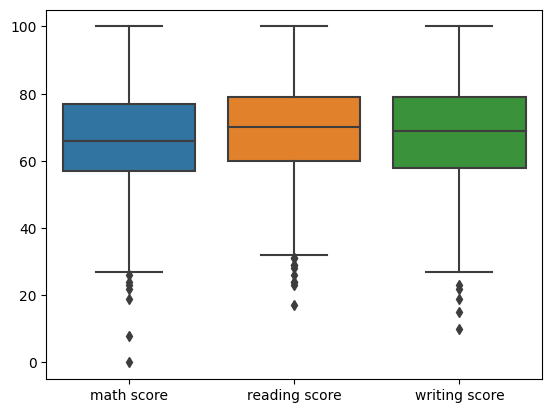

In [28]:
cols
sns.boxplot(cols)

     math score  reading score  writing score
0          True           True           True
1          True           True           True
2          True           True           True
3          True           True           True
4          True           True           True
..          ...            ...            ...
995        True           True           True
996        True           True           True
997        True           True           True
998        True           True           True
999        True           True           True

[1000 rows x 3 columns]


<Axes: >

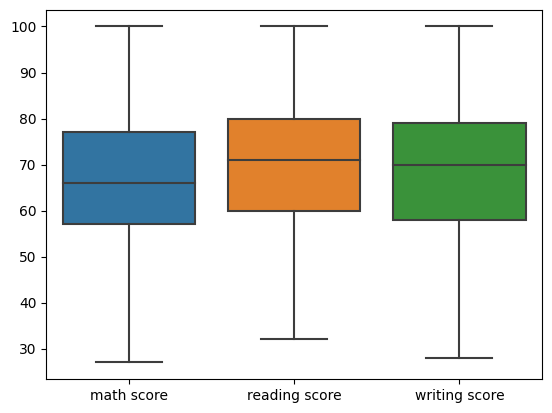

In [39]:
ndf = cols
Q1 = ndf.quantile(0.25)
Q3 = ndf.quantile(0.75)
IQR = Q3-Q1

low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
print(~((low>ndf)|(high<ndf)))
ndf = ndf[~((low>ndf)|(high<ndf)).any(axis=1)]

sns.boxplot(data=ndf)

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
std = StandardScaler()

std_df = ndf
std_df = std.fit_transform(std_df)
std_df = pd.DataFrame(std_df, columns=list(cols.keys()))

new_df = scaler.fit_transform(ndf)
new_df = pd.DataFrame(new_df, columns=list(cols.keys()))

In [35]:
new_df

,math score,reading score,writing score
0,0.616438,0.588235,0.638889
1,0.575342,0.852941,0.833333
2,0.863014,0.926471,0.902778
3,0.273973,0.367647,0.222222
4,0.671233,0.676471,0.652778
...,...,...,...
981,0.835616,0.985294,0.930556
982,0.479452,0.338235,0.375000
983,0.438356,0.573529,0.513889
984,0.561644,0.676471,0.680556


In [36]:
cols.shape

(1000, 3)

<Axes: ylabel='Count'>

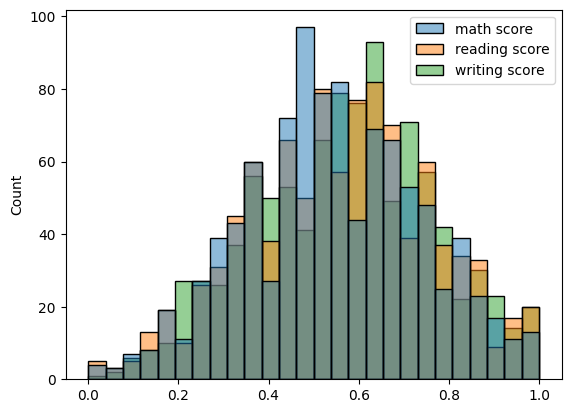

In [37]:
sns.histplot(new_df)